In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time
import math

In [2]:
def process_abalone_data(data,nn=1000,nplot=5,width_calc=False):
    print(f'Total events number: {len(data)}')
    MINs, FOMs, MAXs, INTs, width50, FWHMs = [], [], [], [], [], []
    ts = time.time()
    plt.figure(figsize=(12,6))
    if nn == 0: nn = len(data)
    for i in range(nn):
        if (i % 50000) == 0: print(f'event n. {i} time to process: {time.time()-ts:.2f}')
        bl=np.max(data[i][:])
        wf = bl-data[i]
        max_pos = np.where(wf==np.max(wf))[0][0]
        area = np.sum(wf)
        fom = np.sum(wf[max_pos:])/area
        MINs.append(bl)
        MAXs.append(np.max(wf))
        FOMs.append(fom)
        INTs.append(area)
        fwhm = np.where(wf>np.max(wf)*0.5)[0][-1]-np.where(wf>np.max(wf)*0.5)[0][0]
        FWHMs.append(fwhm)
        if width_calc:
            ii, areafrac = 1, 0
            while areafrac < 0.5:
                ilo50, ihi50 = max_pos-ii, max_pos+ii
                areafrac = np.sum(wf[ilo50:ihi50])/area
                ii += 1
                wid50 = ihi50 - ilo50
            width50.append(wid50)
            if i < nplot: plt.plot(wf,label=f'A={area}, width={wid50}')
        else:
            if i < nplot: plt.plot(wf,label=f'A={area}, f.o.m.={fom:.2f}, fwhm={fwhm}')
    plt.legend()
    return np.array(MINs), np.array(FOMs), np.array(MAXs),np.array(INTs),np.array(width50),np.array(FWHMs)

In [3]:
def plot_hist1D(MINs,MAXs,FOMs,AREAs,width50,bins=200):
    area_space = np.logspace(3.5,7, bins)
    width_space = np.logspace(1,3.5, bins)
    max_space = np.linspace(0,15000,bins)

    plt.figure(figsize=(12,6))
    a=plt.hist(MINs,range=(14700,14800),bins=100)
    plt.yscale('log')
    plt.title('MIN POSITION')
    plt.xlabel('ADC channels',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(MAXs,range=(0,2000),bins=100)
    plt.yscale('log')
    plt.title('MAX POSITION')
    plt.xlabel('ADC channels',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(FOMs,bins=100)
    plt.yscale('log')
    plt.title('F.O.M.')
    plt.xlabel('F.O.M.',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(AREAs,bins=300,range=(0,3e6))
    plt.yscale('log')
    plt.title('Total Integral')
    plt.xlabel('area',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

    plt.figure(figsize=(12,6))
    a=plt.hist(width50,bins=300)
    plt.yscale('log')
    plt.title('width 50%')
    plt.xlabel('width 50%',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)

In [4]:
def plot_area_max(AREAs,MAXs,bins=200,volts=10):
    area_space = np.logspace(3.5,7, bins)
    max_space = np.logspace(1,4.5,bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,MAXs,bins=(area_space,max_space),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area (chn)',ha='right',x=1,fontsize=12)
    plt.ylabel('peak max (chn)',ha='right',y=1,fontsize=12)
    plt.title(f'ABALONE at {volts} V')
    
def plot_area_fom(AREAs,FOMs,bins=200,volts=10):
    area_space = np.logspace(3.5,7, bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,FOMs,bins=(area_space,bins),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('FOM',ha='right',y=1,fontsize=12)
    plt.title(f'ABALONE at {volts} V')
    
def plot_area_width(AREAs,width50,bins=200,volts=10):
    area_space = np.logspace(3.5,7, bins)
    width_space = np.logspace(1,3.5, bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,width50,bins=(area_space,width_space),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('width 50%',ha='right',y=1,fontsize=12)
    plt.title(f'ABALONE at {volts} V')

In [5]:
def data_analysis(filename='/data/abalone/2021_05_07/SiPM2_32V_ABALONE_10k_noLED_h17.dat',volts=10):
    data = psu.read_file(filename)
    MINs, FOMs, MAXs, INTs, width50, FWHMs = process_abalone_data(data,nn=0,nplot=10)
    plot_area_max(INTs,MAXs,bins=200,volts=volts)
    plot_area_fom(INTs,FOMs,bins=200,volts=volts)
    plot_area_width(INTs,FWHMs,bins=200,volts=volts)

/data/abalone/ABALONE_RampingUp/SiPM2_32V_ABALONE_15k_NoLED_T1525.dat Number of events 704864.0
Total events number: 704864
event n. 0 time to process: 0.02
event n. 50000 time to process: 2.76
event n. 100000 time to process: 5.49
event n. 150000 time to process: 8.22
event n. 200000 time to process: 10.95
event n. 250000 time to process: 13.67
event n. 300000 time to process: 16.39
event n. 350000 time to process: 19.11
event n. 400000 time to process: 21.82
event n. 450000 time to process: 24.53
event n. 500000 time to process: 27.24
event n. 550000 time to process: 29.97
event n. 600000 time to process: 32.68
event n. 650000 time to process: 35.39
event n. 700000 time to process: 38.09


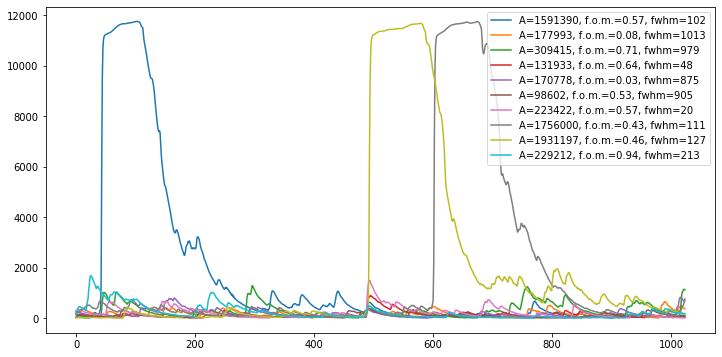

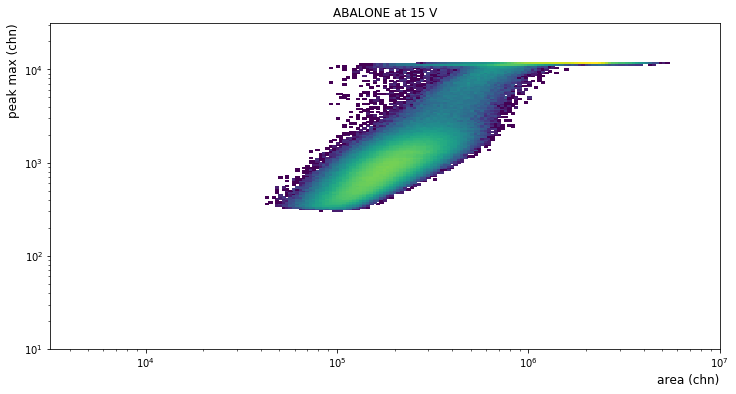

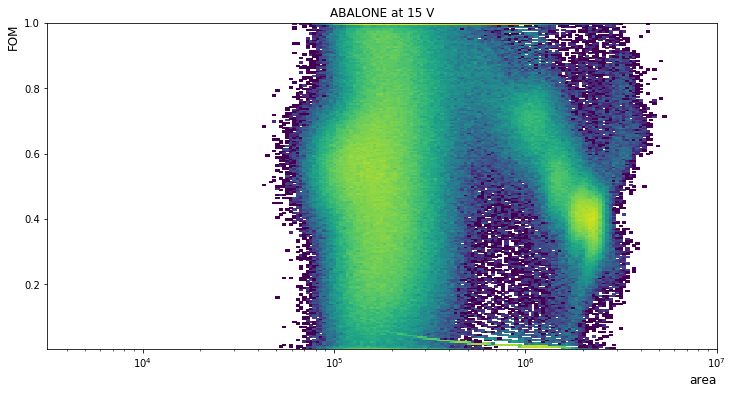

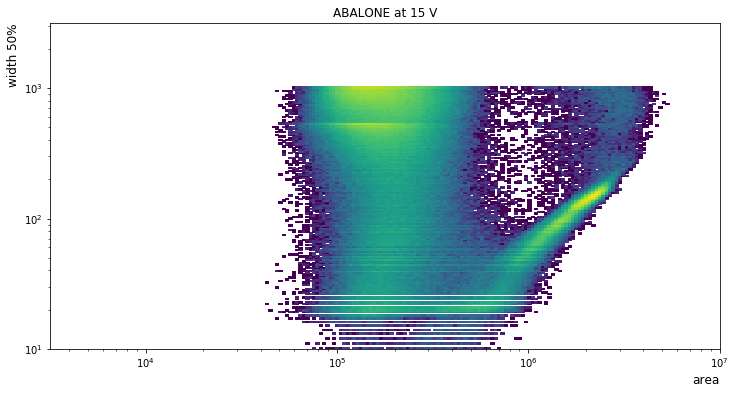

In [6]:
data_analysis(volts=15,filename='/data/abalone/ABALONE_RampingUp/SiPM2_32V_ABALONE_15k_NoLED_T1525.dat')

/data/abalone/ABALONE_RampingUp/2021_05_11_T1451_SiPM_32V_ABALONE_16k_NoLED.dat Number of events 743721.0
Total events number: 743721
event n. 0 time to process: 0.00
event n. 50000 time to process: 2.79
event n. 100000 time to process: 5.56
event n. 150000 time to process: 8.33
event n. 200000 time to process: 11.10
event n. 250000 time to process: 13.85
event n. 300000 time to process: 16.63
event n. 350000 time to process: 19.40
event n. 400000 time to process: 22.17
event n. 450000 time to process: 24.95
event n. 500000 time to process: 27.72
event n. 550000 time to process: 30.50
event n. 600000 time to process: 33.28
event n. 650000 time to process: 36.06
event n. 700000 time to process: 38.85


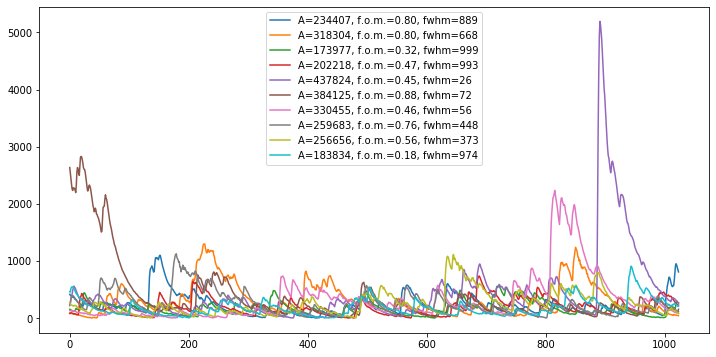

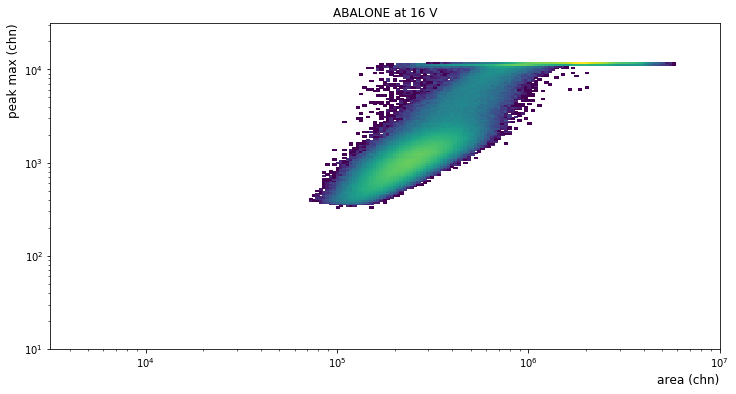

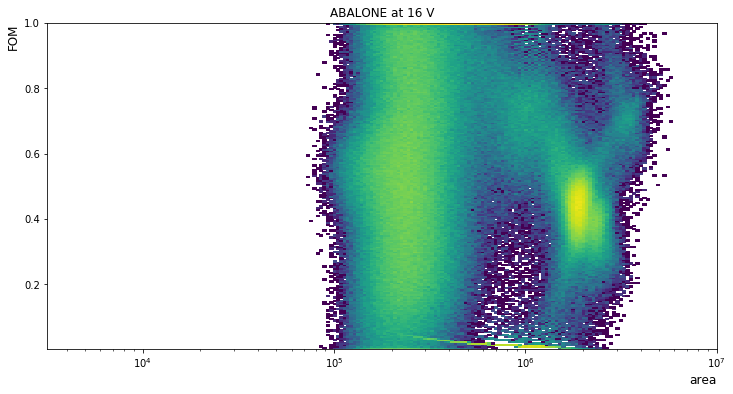

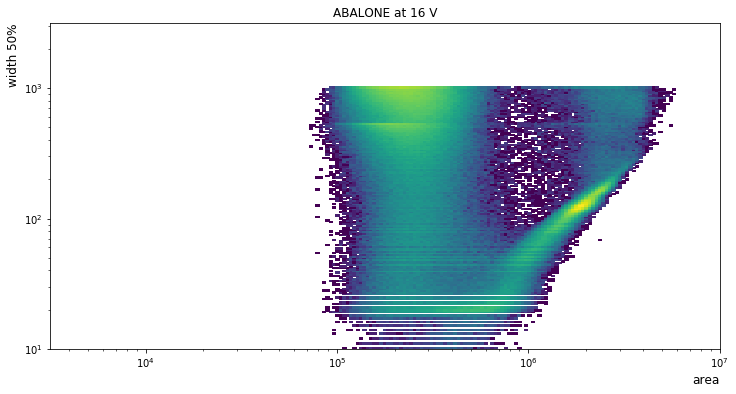

In [7]:
data_analysis(volts=16,filename='/data/abalone/ABALONE_RampingUp/2021_05_11_T1451_SiPM_32V_ABALONE_16k_NoLED.dat')

/data/abalone/ABALONE_RampingUp/SiPM2_32V_ABALONE_15k_NoLED_T1525.dat Number of events 704864.0
/data/abalone/ABALONE_RampingUp/2021_05_11_T1451_SiPM_32V_ABALONE_16k_NoLED.dat Number of events 743721.0
/data/abalone/ABALONE_RampingUp/2021_05_12_T0921_SiPM2_32V_ABALONE_17k_NoLED.dat Number of events 772365.0
Total events number: 704864
event n. 0 time to process: 0.00
event n. 50000 time to process: 2.77
event n. 100000 time to process: 5.52
event n. 150000 time to process: 8.28
event n. 200000 time to process: 11.03
event n. 250000 time to process: 13.78
event n. 300000 time to process: 16.55
event n. 350000 time to process: 19.28
event n. 400000 time to process: 22.01
event n. 450000 time to process: 24.75
event n. 500000 time to process: 27.49
event n. 550000 time to process: 30.22
event n. 600000 time to process: 32.96
event n. 650000 time to process: 35.70
event n. 700000 time to process: 38.48
Total events number: 743721
event n. 0 time to process: 0.00
event n. 50000 time to proc

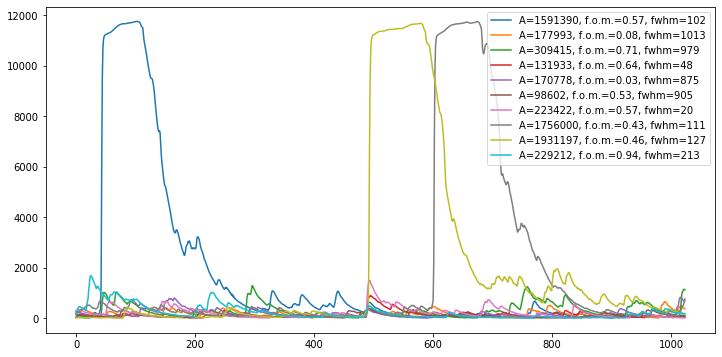

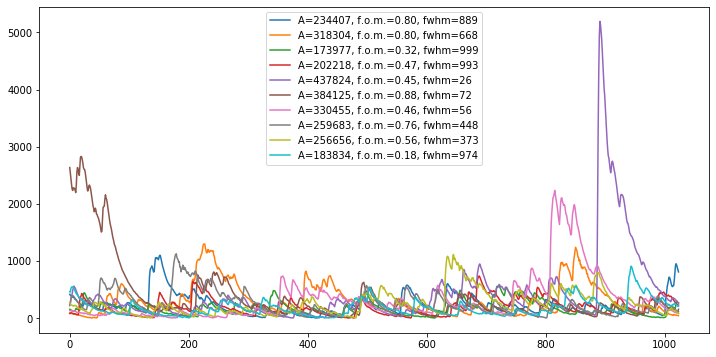

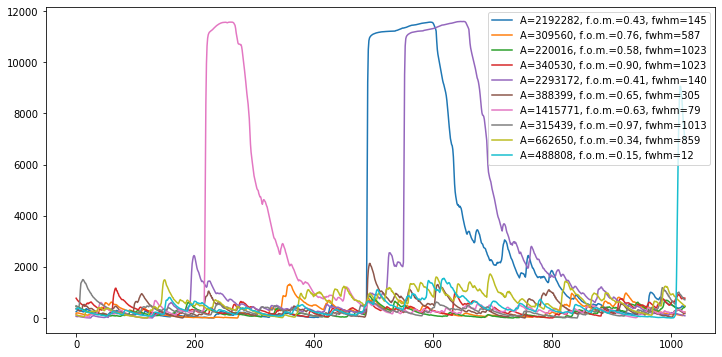

In [17]:
data1 = psu.read_file('/data/abalone/ABALONE_RampingUp/SiPM2_32V_ABALONE_15k_NoLED_T1525.dat')
data2 = psu.read_file('/data/abalone/ABALONE_RampingUp/2021_05_11_T1451_SiPM_32V_ABALONE_16k_NoLED.dat')
data3 = psu.read_file('/data/abalone/ABALONE_RampingUp/2021_05_12_T0921_SiPM2_32V_ABALONE_17k_NoLED.dat')
MINs, FOMs, MAXs, INTs15, width50, FWHMs = process_abalone_data(data1,nn=0,nplot=10)
MINs, FOMs, MAXs, INTs16, width50, FWHMs = process_abalone_data(data2,nn=0,nplot=10)
MINs, FOMs, MAXs, INTs17, width50, FWHMs = process_abalone_data(data3,nn=0,nplot=10)

In [35]:
def plot_spectrum(INTs1,INTs2,INTs3, v1, v2, v3):
    plt.figure(figsize=(12,6))
    a=plt.hist(INTs1,bins=300,range=(0,5e6),lw=2,histtype='step',label=f'ABALONE at {v1} kV')
    b=plt.hist(INTs2,bins=300,range=(0,5e6),lw=2,histtype='step',label=f'ABALONE at {v2} kV')
    c=plt.hist(INTs3,bins=300,range=(0,5e6),lw=2,histtype='step',label=f'ABALONE at {v3} kV')
    plt.yscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('counts',ha='right',y=1,fontsize=12)
    plt.legend(fontsize=14)

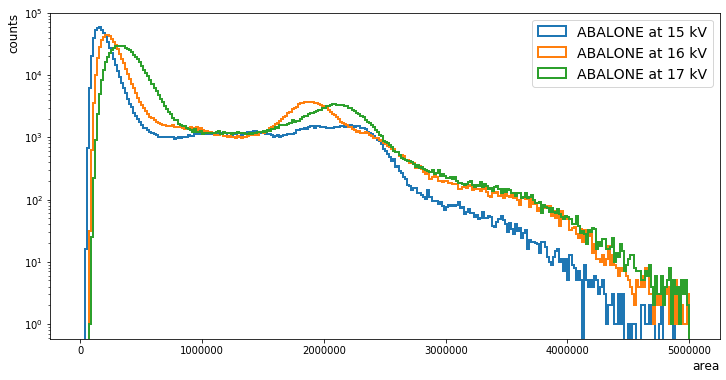

In [36]:
plot_spectrum(INTs15,INTs16,INTs17, 15, 16, 17)